In [44]:
import pandas as pd
data_dir = "/home/juan/Desktop/juan/bio/mirna_mrcv/data/"
res_dir = "/home/juan/Desktop/juan/bio/mirna_mrcv/data/"

res_dir = "/home/juan/Desktop/juan/bio/mirna_mrcv/data/CT2/res/"
data_dir = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/CT2/'

data_dir = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/CT_old/'
res_dir = data_dir + 'res/'

data_dir = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/CT_SM1.2_BT1.2_V2.4/'
res_dir = data_dir + 'res/'

data_dir = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/CT4_SM1.9_BT1.2_V2.4/'
res_dir = data_dir + 'res/'

In [45]:
path_counts = data_dir + "counts.fixed.csv"
df_counts = pd.read_csv(path_counts, sep="\t", comment='#')


In [46]:
df_counts.head(2)

,Locus,Name,main,21dpiR1C.trimmed,21dpiR3C.trimmed,21dpiR1T.trimmed,21dpiR3T.trimmed
0,1A:209-460,Cluster_1,127,20,20,50,37
1,1A:688-753,Cluster_2,86,19,7,33,27


In [47]:
print(len(df_counts.index))

120958


In [48]:
path_results = data_dir + "Results.txt"
df_res = pd.read_csv(path_results, sep="\t")
df_res.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24
0,1A:209-460,Cluster_1,252,127,0.997,64,1.0,+,CGCGGAUUGCUCGAGCUGCUCACGCGGCGAGAGCGGGUCG,25,...,N,N2,-1.0,30,80,3,1,5,4,4
1,1A:688-753,Cluster_2,66,86,0.675,0,1.0,+,CUCUAGACCGACUUUGUGAAAUGAC,5,...,N,N2,-1.0,7,61,5,1,4,4,4


In [49]:
print(len(df_res.index))

38514


In [50]:
df_res = df_res[df_res.MIRNA == "Y"]
print(len(df_res.index))

136


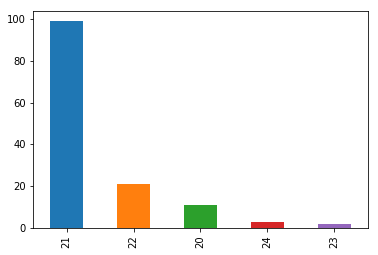

In [51]:
df_res.DicerCall.value_counts().plot('bar')

In [52]:
df_res['seqname'] = df_res['#Locus'].str.split(':').str[0]
df_res['position'] = df_res['#Locus'].str.split(':').str[1]
df_res['start'] = df_res.position.str.split('-').str[0].astype(int)
df_res['end'] = df_res.position.str.split('-').str[1].astype(int)


In [53]:
df_res.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,Long,20,21,22,23,24,seqname,position,start,end
880,1A:309399489-309399664,Cluster_881,176,556,4.364,1,0.002,-,ACGGCAUAGAGGCACUGCAAA,327,...,1,39,440,61,5,4,1A,309399489-309399664,309399489,309399664
1025,1A:419025472-419025570,Cluster_1026,99,388,3.045,20,1.000,+,CGAAUGUAUUUUUUAUGGCUUG,246,...,4,32,84,261,3,2,1A,419025472-419025570,419025472,419025570


In [54]:
#df_res[(df_res.start - df_res.end) > 250]
valids = df_res.Name.unique().tolist()
df_counts = df_counts[df_counts.Name.isin(valids)]

In [55]:
res_path = res_dir + 'counts.valid.csv'
df_counts.to_csv(res_path, sep="\t", index=None)
res_path

'/home/juan/Desktop/juan/bio/mirna_mrcv/data/CT4_SM1.9_BT1.2_V2.4/res/counts.valid.csv'